# **Sequencial Chain from Langchain**
Sequential chains are used to perform any series of operations on a piece of data. Sometimes you want to do multiple LLM calls, each call performs some sort of action on the input one after the other. In such scenario, we can use multiple chains coupled together. A sequencial chain from langchain may serve our purpose.
There are two types of Sequencial Chain.



1.   **SimpleSequencialChain**
2.   **Sequential Chain**

A sequential chain is a chain that allows you to work with single/multiple inputs, and there Can be single/multiple final outputs. You can name the variables to your input and output. This can be useful for performing a series of operations on a piece of data.

## **Aspect Based Sentiment Analysis**
Aspect-Based Sentiment Analysis (ABSA) is a natural language processing (NLP) technique that aims to analyze and extract sentiments or opinions related to specific aspects or attributes of a given target entity or topic within textual data. It goes beyond traditional sentiment analysis by providing a more fine-grained understanding of opinions expressed in text.

### **Why there is a need for ABSA?**
ABSA addresses the limitations of traditional sentiment analysis, providing a more nuanced understanding of customer sentiment at the aspect level. By analyzing sentiments associated with specific aspects, businesses can make informed decisions, improve products or services, enhance customer satisfaction, and manage their brand reputation effectively.
**Fine-Grained Analysis:** ABSA provides a more granular and detailed understanding of sentiment compared to traditional sentiment analysis. Instead of just determining the overall sentiment of a text, ABSA enables analysis at the aspect level, allowing businesses to gain insights into specific attributes, features, or aspects of a product or service. This fine-grained analysis helps in understanding customer opinions and preferences with greater precision.
There are two steps in which it is done;
1. **Aspect Extraction**
2. **Aspect Sentiment Extraction**


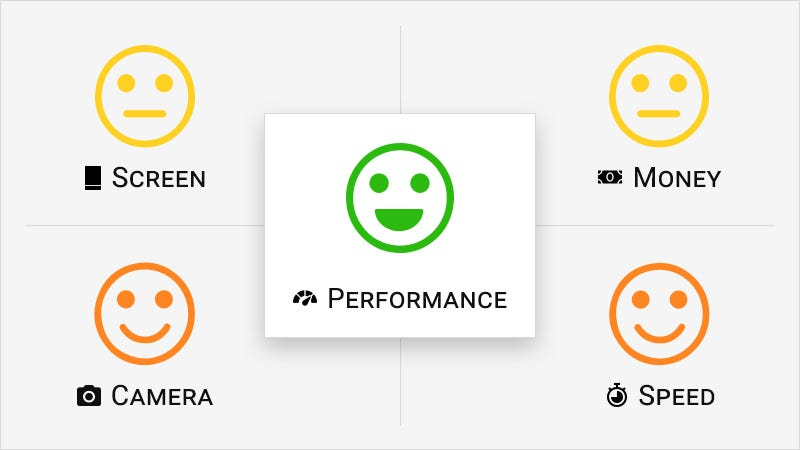

### **Where we can use ABSA?**
1. Customer Experience Analysis: ABSA enables businesses to analyze customer experiences across different aspects of their offerings. By understanding sentiment variations across aspects, businesses can identify areas of improvement, address pain points, and enhance customer satisfaction. This analysis allows for targeted actions and specific improvements to enhance the overall customer experience.

2. Brand Reputation Management: ABSA plays a crucial role in monitoring and managing brand reputation. By analyzing sentiments associated with different aspects of a brand, businesses can proactively address negative sentiments, identify potential issues, and respond to customer concerns. This proactive approach helps protect and enhance brand reputation.

3. Market Research and Competitor Analysis: ABSA supports market research efforts by providing insights into customer preferences, satisfaction levels, and sentiment trends. It enables businesses to understand how their offerings compare to competitors' products or services, identify market gaps, and make data-driven decisions for product positioning and development.

4. Social Media Monitoring: With the rise of social media, ABSA is essential for monitoring and analyzing sentiments expressed by customers on platforms like Twitter, Facebook, or online review sites. Businesses can track customer feedback, identify emerging trends, and respond promptly to customer issues or inquiries, thereby fostering better customer relationships.

### **Problem Statement**
In this blog, we will delve into a common concern regarding nursing homes: how to assess their quality of service. To tackle this issue, we will explore the concept of Aspect-Based Sentiment Analysis (ABSA) and its application in evaluating nursing facilities.

To determine whether a nursing home is providing satisfactory care, it is important to consider various aspects of their services. These aspects can be broadly categorized as follows:

**1. Staff:** The attitude of the staff members and their level of training are crucial factors in assessing the quality of care.

**2. Food:** The nutritional value of the meals offered, the variety of options available, and the provision of specialized dietary plans for residents with specific health conditions, such as diabetes.

**3. Building:** The condition and amenities provided in the living spaces significantly impact the residents' comfort and well-being.

**4. Activities:** Engaging residents in stimulating activities contributes to their overall happiness and satisfaction.

**5. Management:** The effectiveness and competence of the management team play a vital role in ensuring a smooth operation and a high standard of care.

**6. Cost:** Affordability is an essential consideration for residents and their families when selecting a nursing home.

These are just a few examples of the aspects that can influence the quality of care in a nursing home. By evaluating these factors, we can gain valuable insights into the overall experience of residents and make informed decisions when choosing a nursing facility.



### **Sequencial Chain Usage**
To solve our problem using a sequential chain, we can divide the solution into two main parts: aspect extraction and aspect sentiment. We can also classify the aspects, but we will do that later. This means that we need two chains in total. The first chain will extract the aspects from the review, and the second chain will use the output of the first chain to give us the sentiment of the aspects.

1. **Aspect Extraction:**
Aspect extraction is the process of identifying the different aspects of a product or service that are being discussed in a review. For example, in the review "The food was delicious, but the service was slow," the aspects are "food" and "service."

2. **Aspect Sentiment:**
Aspect sentiment is the process of determining the emotional tone of a review with respect to a particular aspect. For example, in the review "The food was delicious, but the service was slow," the sentiment of the "food" aspect is positive, while the sentiment of the "service" aspect is negative.



## **Code for Sequencial Chain**

In [ ]:
!pip install langchain -U
!pip install openai
!pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from langchain.llms import OpenAI
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.prompts.few_shot import FewShotPromptTemplate
from langchain.chains import SequentialChain
from dotenv import load_dotenv
import os
import openai

review: We are extracting the aspects from the review given by the residents of nursing homes. Take the Review as input and extract the different aspects about the the staff, food,
building, activities, management, cost of the the nuursing home.

In [ ]:
load_dotenv('/content/drive/MyDrive/vars.env')
os.environ["OPENAI_API_KEY"] = os.getenv('api_key')
llm = OpenAI(temperature=0.7)

## **Aspect Extraction Chain**

In [ ]:
# This is an LLMChain for Aspects Extraction.

examples =[ {
"review": '''Improve the communication updates to families. Improve consistency, with housekeeping it was supposed to be weekly but now it is every 2 or 3 weeks. \
There is no consistency in the staff either due to the high turnover rate. Improve the services in the dining room along with meal options.''',
"aspects": '''Relevant Aspects are communication on updates, housekeeping consistency, staff turnover, and dining services.'''
},

{"review": '''On paper they do, but my wife has not been brought to them. I have not had a meeting to set up a plan for her. No one wheels her to partake in the activities. They need somebody there that could take them to activities if they wanted. They should bring them to activities where other people will watch over them. The people that are in charge, like the head nurse and activities director, are good about getting ahold of and answering your questions. Once you get down to the next level, they are overwhelmed. They could use another set of eyes and hands. In the memory care area, a lot of people need care at the same time.''',
"aspects": '''Relevant Aspects are Staff Attitude, Care Plan Setup, Staff Involvement in Activities, Oversight during Activities, Memory Care Area'''}
]


In [ ]:
#Configure a formatter that will format the few shot examples into a string. This formatter should be a PromptTemplate object.
prompt_template='''
Review: {review}
{aspects}
'''
example_prompt = PromptTemplate(input_variables=["review", "aspects"], template= prompt_template)

print(example_prompt.format(**examples[0]))


Review: Improve the communication updates to families. Improve consistency, with housekeeping it was supposed to be weekly but now it is every 2 or 3 weeks. There is no consistency in the staff either due to the high turnover rate. Improve the services in the dining room along with meal options.
Relevant Aspects are communication on updates, housekeeping consistency, staff turnover, and dining services.



In [ ]:
final_prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Review: {review}/n",
    input_variables=["review"],
    prefix="We are extracting the aspects from the review given by the residents of nursing homes. Take the Review as input and extract the different aspects about the the staff, food, \
building, activities, management, cost of the the nuursing home. Then return the aspects as a list."
)

print(final_prompt.format(review='''The community has popcorn days, church, birthday celebrations, holiday parties, therapy dogs, and so much more. My mother is very happy here, and she is kept active. They do a great job of keeping the elderly minds active and involved. The dining program is great as well. My mother tends to eat slow, but the dining program always lets my mother stay to finish her food. Any residents that want to practice religion, this is also offered here! More outings have been added, they just went to Walmart recently.'''))

We are extracting the aspects from the review given by the residents of nursing homes. Take the Review as input and extract the different aspects about the the staff, food, building, activities, management, cost of the the nuursing home. Then return the aspects as a list.


Review: Improve the communication updates to families. Improve consistency, with housekeeping it was supposed to be weekly but now it is every 2 or 3 weeks. There is no consistency in the staff either due to the high turnover rate. Improve the services in the dining room along with meal options.
Relevant Aspects are communication on updates, housekeeping consistency, staff turnover, and dining services.



Review: On paper they do, but my wife has not been brought to them. I have not had a meeting to set up a plan for her. No one wheels her to partake in the activities. They need somebody there that could take them to activities if they wanted. They should bring them to activities where other people will watch over 

In [ ]:
aspect_extraction_chain= LLMChain(llm=llm, prompt=final_prompt, output_key='aspects')

In [ ]:
output=aspect_extraction_chain.predict(review="The community has popcorn days, church, birthday celebrations, holiday parties, therapy dogs, and so much more. My mother is very happy here, and she is kept active. They do a great job of keeping the elderly minds active and involved. The dining program is great as well. My mother tends to eat slow, but the dining program always lets my mother stay to finish her food. Any residents that want to practice religion, this is also offered here! More outings have been added, they just went to Walmart recently.")

In [ ]:
output

'\nRelevant Aspects are Activities, Dining Program, Elderly Minds Activity, Religious Practices, and Outings.'

## **Sentiment Chain**

In [ ]:
llm = OpenAI(temperature=0.7)

In [ ]:
#Configure a formatter that will format the few shot examples into a string. This formatter should be a PromptTemplate object.
prompt_template='''
Gien below review and the extracted Aspects, Tell me about the sentiment of these aspects. e.g. 'Positive', 'Negative', or 'Neutral' in a format like (aspect, sentiment).
Review: {review}
Aspects: {aspects}
[(Aspect1, Sentiment of Aspect1), (Aspect2, Sentiment of Aspect2),....]
'''
example_prompt2 = PromptTemplate(input_variables=["review", "aspects"], template= prompt_template)

print(example_prompt2)

input_variables=['review', 'aspects'] output_parser=None partial_variables={} template="\nGien below review and the extracted Aspects, Tell me about the sentiment of these aspects. e.g. 'Positive', 'Negative', or 'Neutral' in a format like (aspect, sentiment).\nReview: {review}\nAspects: {aspects}\n[(Aspect1, Sentiment of Aspect1), (Aspect2, Sentiment of Aspect2),....]\n" template_format='f-string' validate_template=True


In [ ]:
aspect_sentiemnt_chain=LLMChain(llm=llm, prompt=example_prompt2, output_key="Aspects_with_Sentiment")

### **Final Sequencial Chain**

In [ ]:

overall_chain = SequentialChain(
    chains=[aspect_extraction_chain, aspect_sentiemnt_chain],
    input_variables=["review"],
    # Here we return multiple variables
    output_variables=["review", "aspects", "Aspects_with_Sentiment"],
    verbose=True)

In [ ]:
overall_chain({"review":"The staff here is really nice and cooperative. But I don't like their dinner menu. It lacks the variety. But breakfast Menu is very good"})



> Entering new  chain...

> Finished chain.


{'review': "The staff here is really nice and cooperative. But I don't like their dinner menu. It lacks the variety. But breakfast Menu is very good",
 'aspects': '\nRelevant Aspects are Staff Attitude, Dinner Menu Variety, Breakfast Menu',
 'Aspects_with_Sentiment': '(Staff Attitude, Positive), (Dinner Menu Variety, Negative), (Breakfast Menu, Positive)'}